In [1]:
import json
import uuid
from pydantic import BaseModel, Field
from typing import List



In [18]:
# ----------------------------------------------------
# Definição dos Modelos Pydantic
# ----------------------------------------------------
class Categoria(BaseModel):
    nome: str
    objetos: List[str]

class KnowledgeObjectFile(BaseModel):
    nome: str
    disciplina: str
    categorias: List[Categoria]
    id: str = None  # Campo extra para armazenar ID

class KnowledgeObjectListFile(BaseModel):
    # Usamos alias para manter a chave original com acento
    areas_de_competencia: List[KnowledgeObjectFile] = Field(alias="áreas_de_competência")


In [16]:
# ----------------------------------------------------
# Função auxiliar para adicionar IDs
# ----------------------------------------------------
def add_ids_to_data(data: KnowledgeObjectListFile) -> KnowledgeObjectListFile:
    # Percorre cada "KnowledgeObjectFile"
    for knowledge_obj in data.areas_de_competencia:
        for categoria in knowledge_obj.categorias:
            novos_objetos = []
            for obj in categoria.objetos:
                novos_objetos.append({"id": str(uuid.uuid4()), "objeto": obj})
            categoria.objetos = novos_objetos
    return data

In [9]:

# ----------------------------------------------------
# Função principal de leitura, adição de id e escrita
# ----------------------------------------------------
def process_json_file(input_file_path: str, output_file_path: str) -> None:
    try:
        # 1. Ler arquivo de entrada
        with open(input_file_path, "r", encoding="utf-8") as f:
            raw_data = json.load(f)

        # 2. Validar/parse com Pydantic
        data_parsed = KnowledgeObjectListFile.model_validate(raw_data)

        # 3. Inserir IDs
        data_with_ids = add_ids_to_data(data_parsed)

        # 4. Gerar dicionário final (mantendo alias de campo)
        data_dict = data_with_ids.model_dump(by_alias=True, exclude_unset=False)

        # 5. Salvar em arquivo de saída
        with open(output_file_path, "w", encoding="utf-8") as f:
            json.dump(data_dict, f, indent=4, ensure_ascii=False)

        print("Arquivo processado com sucesso!")
    except Exception as e:
        print("Erro ao processar o arquivo:", str(e))

In [19]:
process_json_file("data/knowledgeObjects.json", "data/knowledgeObjects_output.json")

Arquivo processado com sucesso!


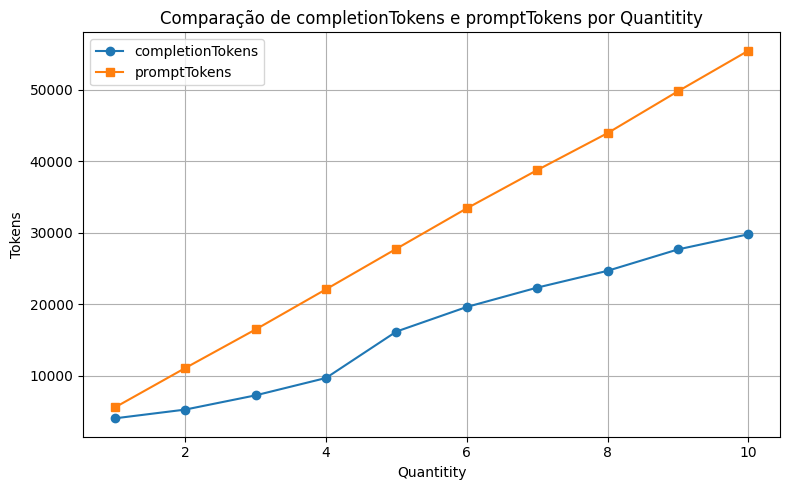

In [1]:
import matplotlib.pyplot as plt

# Dados coletados
data = [
    {"quantitity": 1, "completionTokens": 4006, "promptTokens": 5529},
    {"quantitity": 2, "completionTokens": 5231, "promptTokens": 11043},
    {"quantitity": 3, "completionTokens": 7225, "promptTokens": 16448},
    {"quantitity": 4, "completionTokens": 9654, "promptTokens": 22067},
    {"quantitity": 5, "completionTokens": 16151, "promptTokens": 27740},
    {"quantitity": 6, "completionTokens": 19593, "promptTokens": 33393},
    {"quantitity": 7, "completionTokens": 22301, "promptTokens": 38746},
    {"quantitity": 8, "completionTokens": 24652, "promptTokens": 43922},
    {"quantitity": 9, "completionTokens": 27646, "promptTokens": 49778},
    {"quantitity": 10, "completionTokens": 29765, "promptTokens": 55455},
]

# Extrair listas para o plot
quantities = [row["quantitity"] for row in data]
completion_tokens = [row["completionTokens"] for row in data]
prompt_tokens = [row["promptTokens"] for row in data]

# Plotar as curvas
plt.figure(figsize=(8, 5))
plt.plot(quantities, completion_tokens, marker="o", label="completionTokens")
plt.plot(quantities, prompt_tokens, marker="s", label="promptTokens")

plt.xlabel("Quantitity")
plt.ylabel("Tokens")
plt.title("Comparação de completionTokens e promptTokens por Quantitity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

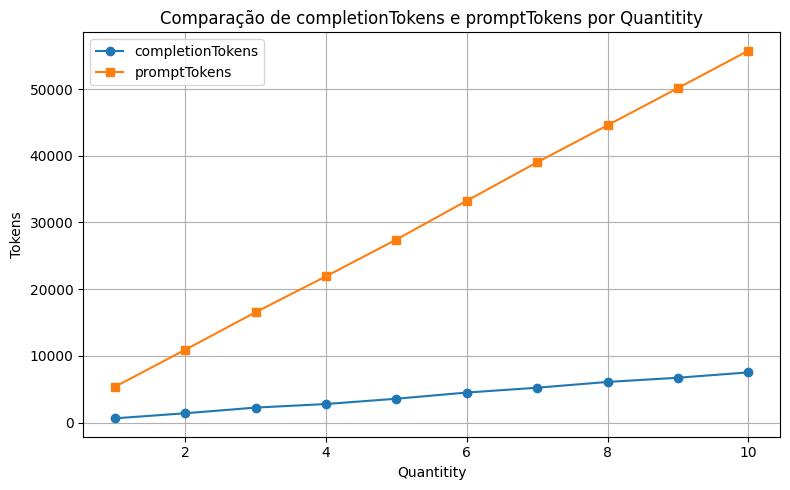

In [2]:
import matplotlib.pyplot as plt

# Dados coletados
data = [
    {"quantitity": 1, "completionTokens": 646, "promptTokens": 5373},
    {"quantitity": 2, "completionTokens": 1407, "promptTokens": 10925},
    {"quantitity": 3, "completionTokens": 2256, "promptTokens": 16550},
    {"quantitity": 4, "completionTokens": 2792, "promptTokens": 21929},
    {"quantitity": 5, "completionTokens": 3587, "promptTokens": 27446},
    {"quantitity": 6, "completionTokens": 4512, "promptTokens": 33257},
    {"quantitity": 7, "completionTokens": 5236, "promptTokens": 39022},
    {"quantitity": 8, "completionTokens": 6101, "promptTokens": 44572},
    {"quantitity": 9, "completionTokens": 6731, "promptTokens": 50143},
    {"quantitity": 10, "completionTokens": 7534, "promptTokens": 55742},
]

# Extrair listas para o plot
quantities = [row["quantitity"] for row in data]
completion_tokens = [row["completionTokens"] for row in data]
prompt_tokens = [row["promptTokens"] for row in data]

# Plotar as curvas
plt.figure(figsize=(8, 5))
plt.plot(quantities, completion_tokens, marker="o", label="completionTokens")
plt.plot(quantities, prompt_tokens, marker="s", label="promptTokens")

plt.xlabel("Quantitity")
plt.ylabel("Tokens")
plt.title("Comparação de completionTokens e promptTokens por Quantitity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()